# Where it Pays to Attend College: An Exploration
## https://www.kaggle.com/wsj/college-salaries
### First step, import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

### Import the datasets.

In [2]:
df1 = pd.read_csv('../financials_datasets/degrees-that-pay-back.csv')    #by major (50)              -- starting, median, percentile salaries
df2 = pd.read_csv('../financials_datasets/salaries-by-college-type.csv') #by uni (269) / school type -- starting, median, percentile salaries
df3 = pd.read_csv('../financials_datasets/salaries-by-region.csv')       #by uni (320) / region      -- starting, median, percentile salaries

### Let's see what we are working with.

In [3]:
df1.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### Rename columns to be easier to work with.

In [4]:
df1.columns = ['major','bgn_p50','mid_p50','delta_bgn_mid','mid_p10','mid_p25','mid_p75','mid_p90']
df1.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### We notice that the the Dollar Sign values are actually strings.

In [5]:
type(df1['bgn_p50'][1])

str

### We'll convert all the Dollar Sign values from strings to numbers.

In [6]:
dollar_cols = ['bgn_p50','mid_p50','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols:
    df1[x] = df1[x].str.replace("$","")
    df1[x] = df1[x].str.replace(",","")
    df1[x] = pd.to_numeric(df1[x])

df1.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


### Do we have a number now? Yes.

In [7]:
df1['bgn_p50'].mean()

np.float64(44310.0)

### Let's take a look at what we have.
##### 
Analysis: Looks like most majors coming out of school start at salaries around $41,000, with most people making between $37,000 and $50,000. 
By mid career, average salaries are around $72,000, with most people making between $60,000 and $90,000.

If you are a top performer (75th percentile), your salary, might be around $100,000, or, between $83,000 and $120,000.

If you are a very top performer (90th percentile), your salary, might be around $146,000, or, between $124,000 and $162,000.

Of course, these numbers will vary depending on major. There can be a lot of variability depending on the college major.

In [8]:
df1.describe()

,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


### Let's look at the dataset again.

In [9]:
df1.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


### Let's sort values by starting median salary, so that our graph will be in order.
##### Analysis: Major with highest starting salary = Physicians Assistant

In [10]:
df1.sort_values(by = 'bgn_p50', ascending = False, inplace=True)
df1.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


### Let's declare a new index, to graph our values by.

In [11]:
df1 = df1.reset_index()
df1.head(10)

,index,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
1,8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
2,12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
3,19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
4,38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
5,1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
6,30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
7,13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
8,40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
9,10,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0


## Initial Graph
### Let's see what we have.

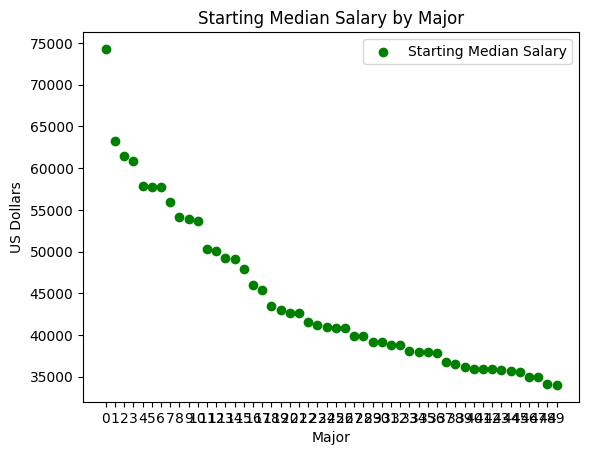

In [12]:
x = df1.index
y = df1['bgn_p50']
labels = df1.index

plt.scatter(x,y, color='g', label = 'Starting Median Salary')
plt.xticks(x, labels) 

plt.xlabel('Major')
plt.ylabel('US Dollars')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

### Let's add the major names along the x-axis.

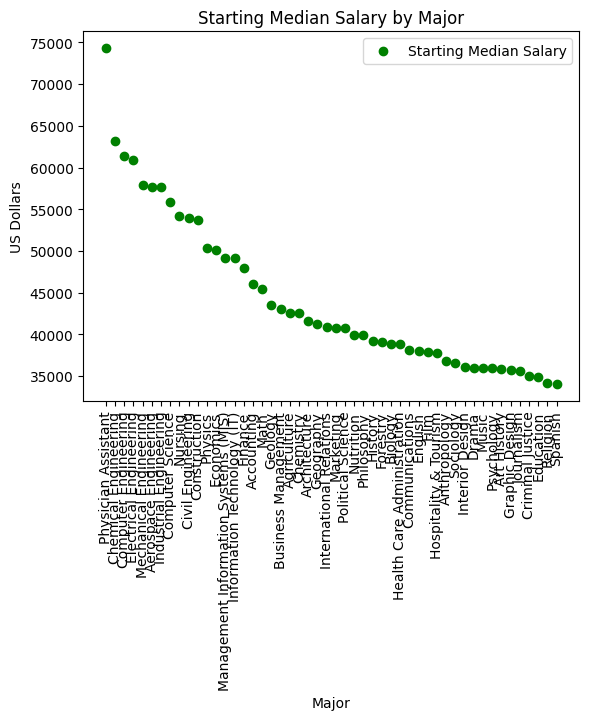

In [13]:
x = df1.index
y = df1['bgn_p50']
labels = df1['major']
#labels = df1.index

plt.scatter(x,y, color='g', label = 'Starting Median Salary')
plt.xticks(x, labels, rotation = 'vertical') #rotation = 'vertical'

plt.xlabel('Major')
plt.ylabel('US Dollars')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

### Let's flip the x and y axes.

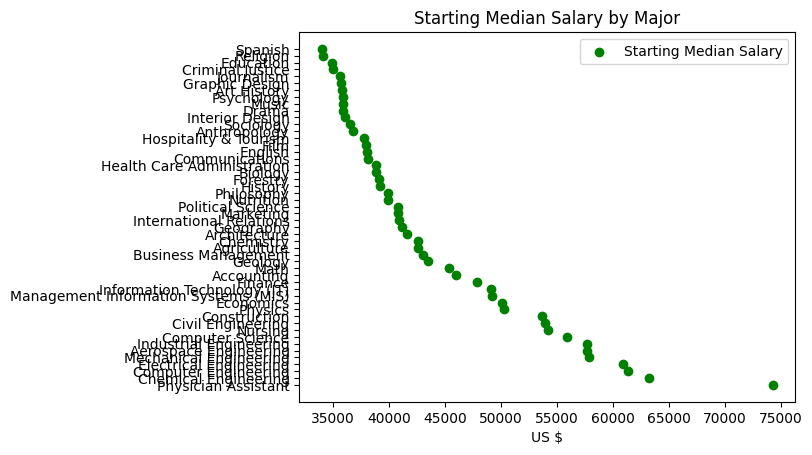

In [14]:
x = df1['bgn_p50'] #switch x and y labels
y = df1.index
labels = df1['major']
#labels = df1.index

plt.scatter(x, y, color='g', label = 'Starting Median Salary') 
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('') #hide label
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

### Let's change the index so the values go from high to low.

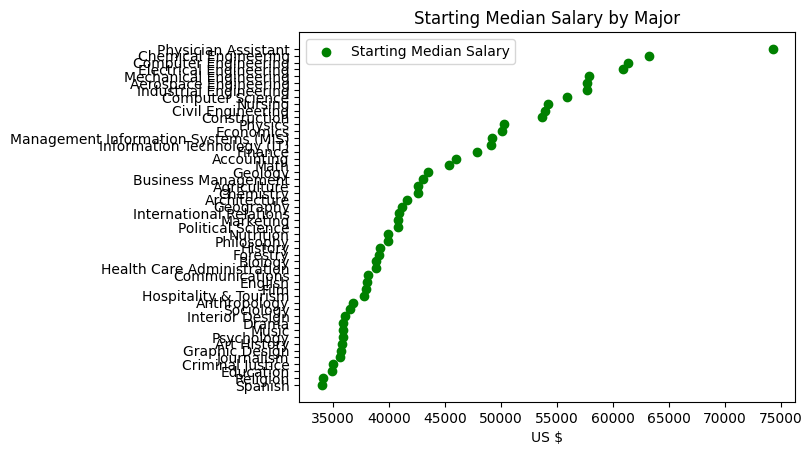

In [15]:
x = df1['bgn_p50']
y = len(df1.index) - df1.index #swap high and low
labels = df1['major']

plt.scatter(x, y, color='g', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

## Graph 1: Starting Median Salary by Major
### Let's make the figure bigger. Nice! We have our first valuable graph.
##### 
Analysis: Physician's Assistants had very high starting salaries, followed by engineering degrees. Nursing also seems higher than one might expect. Next come majors such as Business Management, Political Science, Marketing. At the bottom, we have the art majors: Music, Drama, Art, followed by Education, Religion, and Spanish at the bottom.

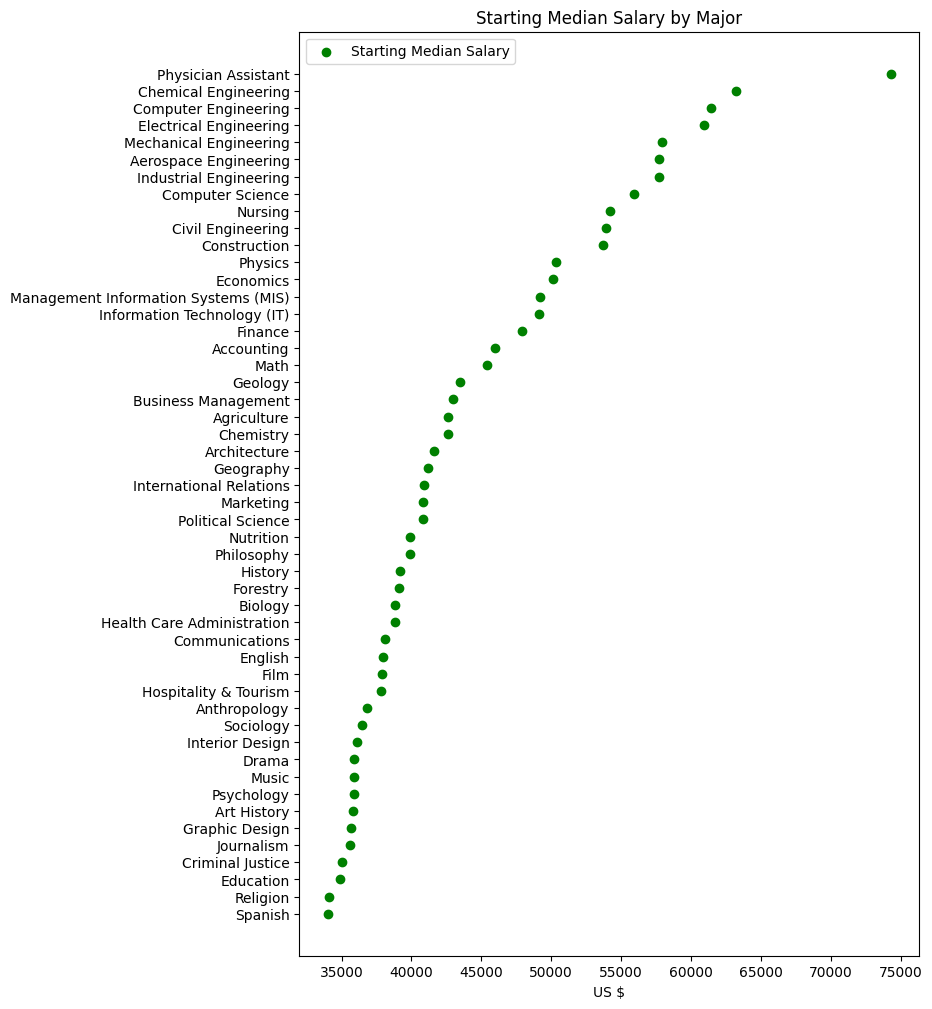

In [16]:
fig = plt.figure(figsize=(8,12))

x = df1['bgn_p50']
y = len(df1.index) - df1.index
labels = df1['major']

plt.scatter(x, y, color='g', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend(loc=2) #move the legend
plt.show()

### But wait, that was just the (median) starting salary. Let's add the (median) mid-career salary, which will be more important over the long-haul.
##### 
Analysis: When we plot the mid-career salaries, we see that majors carry generally the same pattern, but there are some shifts as well. Physicians Assistants, Nursing, and Nutrition majors all seem to have some decreases in the rankings.

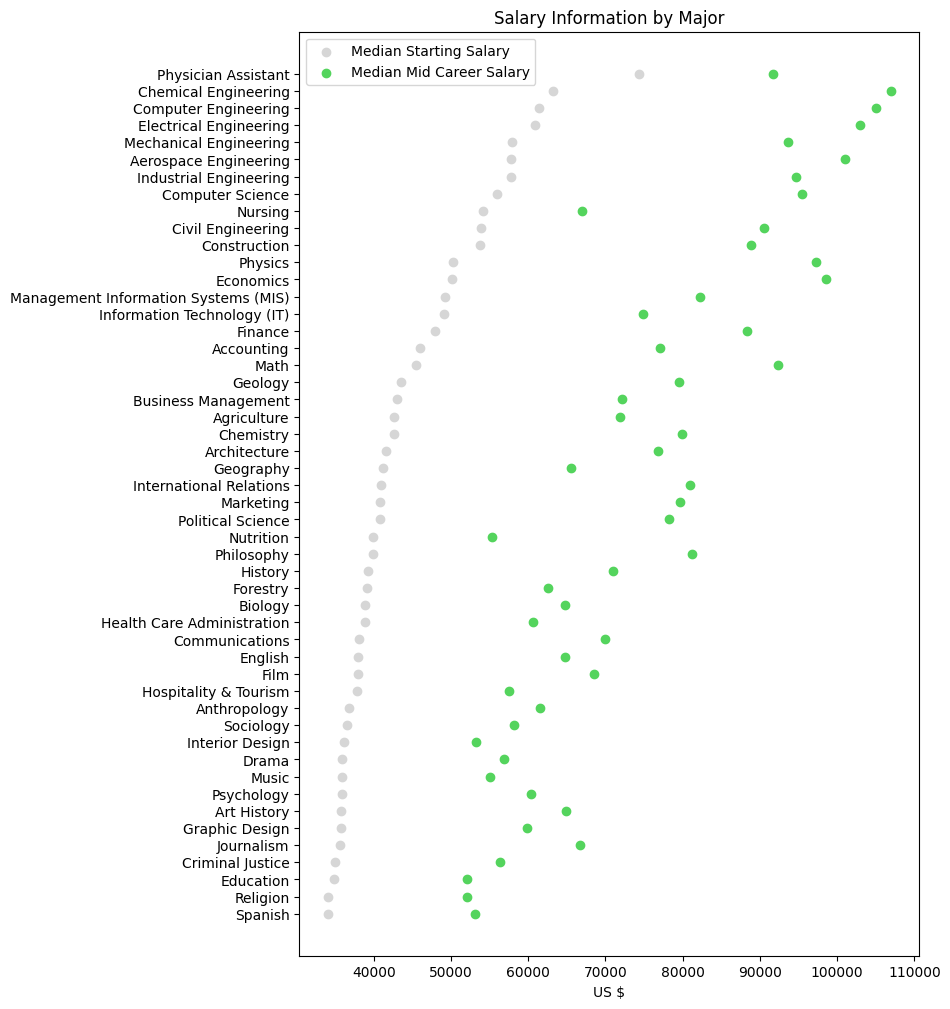

In [17]:
fig = plt.figure(figsize=(8,12))

x = df1['bgn_p50']
y = len(df1.index) - df1.index
labels = df1['major']

plt.scatter(x, y, color='#d6d6d6', label = 'Median Starting Salary')
plt.yticks(y, labels)

x3 = df1['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc=2) #move the legend
plt.show()

## Graph 2: Starting & Mid Career Median Salary by Major
### Now we'll sort by the (median) mid-career salary, since we think that is more important to us. We will also have the median starting salary as a benchmark of potential interest.
##### 
Analysis: We see again that the Physicians Assistants, Nursing, and Nutrition majors have fallen in the rankings. Top money makers (by mid-career salaries) are the engineering majors, with Chemical Engineering at the top.

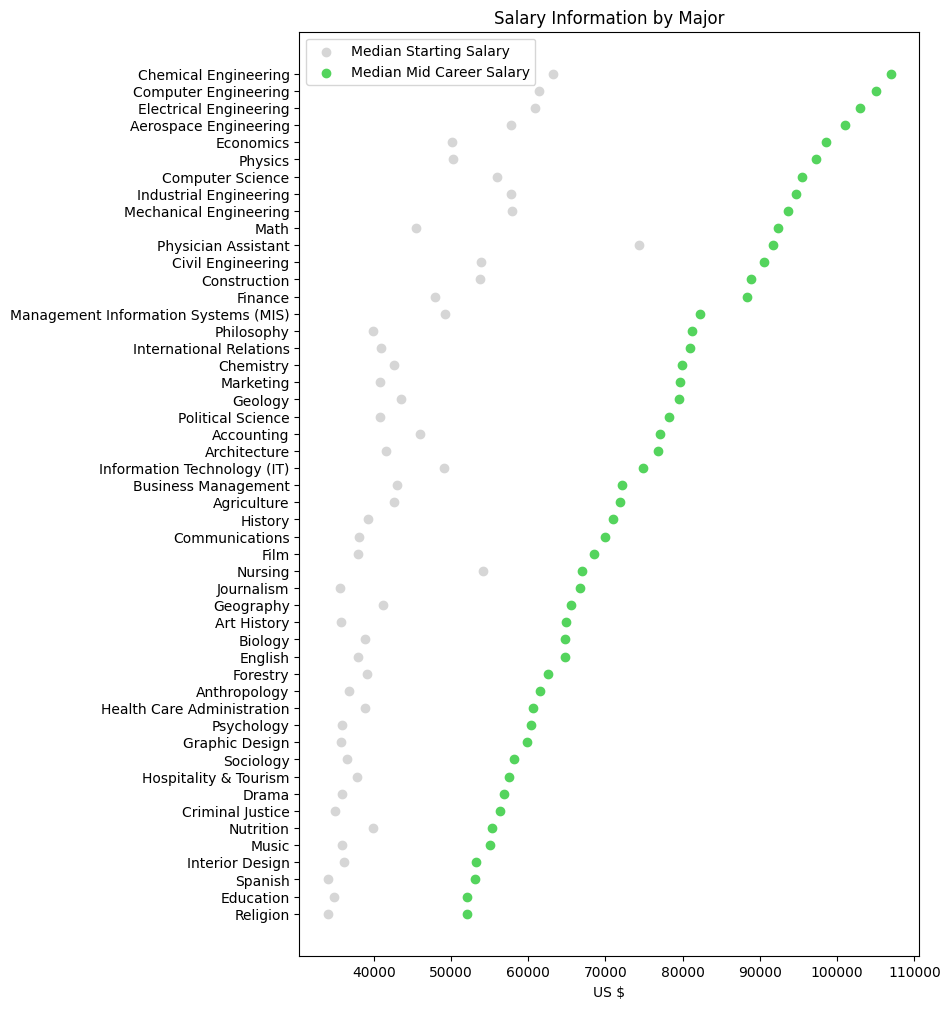

In [18]:
df2 = df1.sort_values(by = 'mid_p50', ascending = False)
df2 = df2.reset_index()

fig = plt.figure(figsize=(8,12))

x = df2['bgn_p50']
y = len(df2.index) - df2.index
labels = df2['major']

plt.scatter(x, y, color='#d6d6d6', label = 'Median Starting Salary')
plt.yticks(y, labels)

x3 = df2['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc=2) #move the legend
plt.show()

### Let's erase the starting salary now. We'll be looking at the mid-career salaries, since we think those are more important. We'll also plot the 25th and 75th percentiles of mid-career salaries for the given majors. 

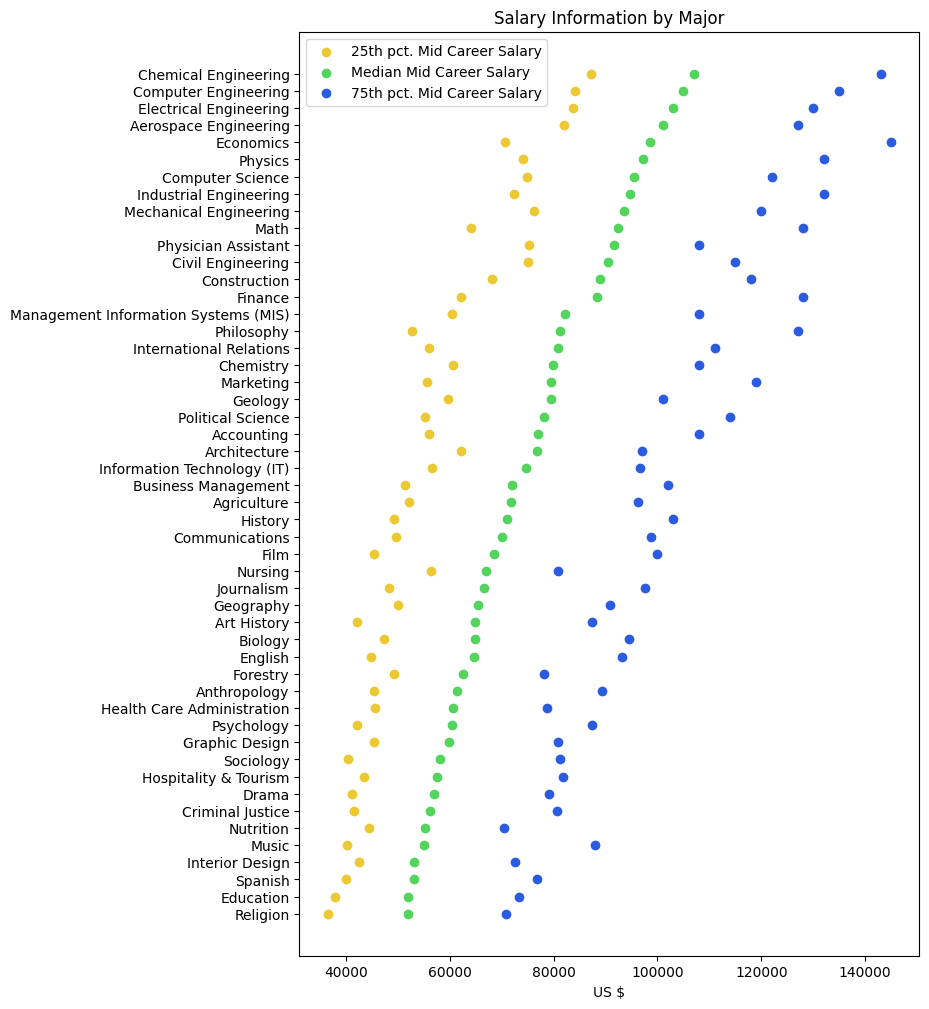

In [19]:
df2 = df1.sort_values(by = 'mid_p50', ascending = False)
df2 = df2.reset_index()

fig = plt.figure(figsize=(8,12))

x = df2['bgn_p50']
y = len(df2.index) - df2.index
labels = df2['major']

#plt.scatter(x, y, color='b', label = 'Median Starting Salary')
plt.yticks(y, labels)

x2 = df2['mid_p25']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')

x3 = df2['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

x4 = df2['mid_p75']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc=2) #move the legend
plt.show()

### Let's add the 10th and 90th percentiles. So now we have a graph that gives, by major, the 10th, 25th, 50th (median), 75th, and 90th, mid-career salaries.

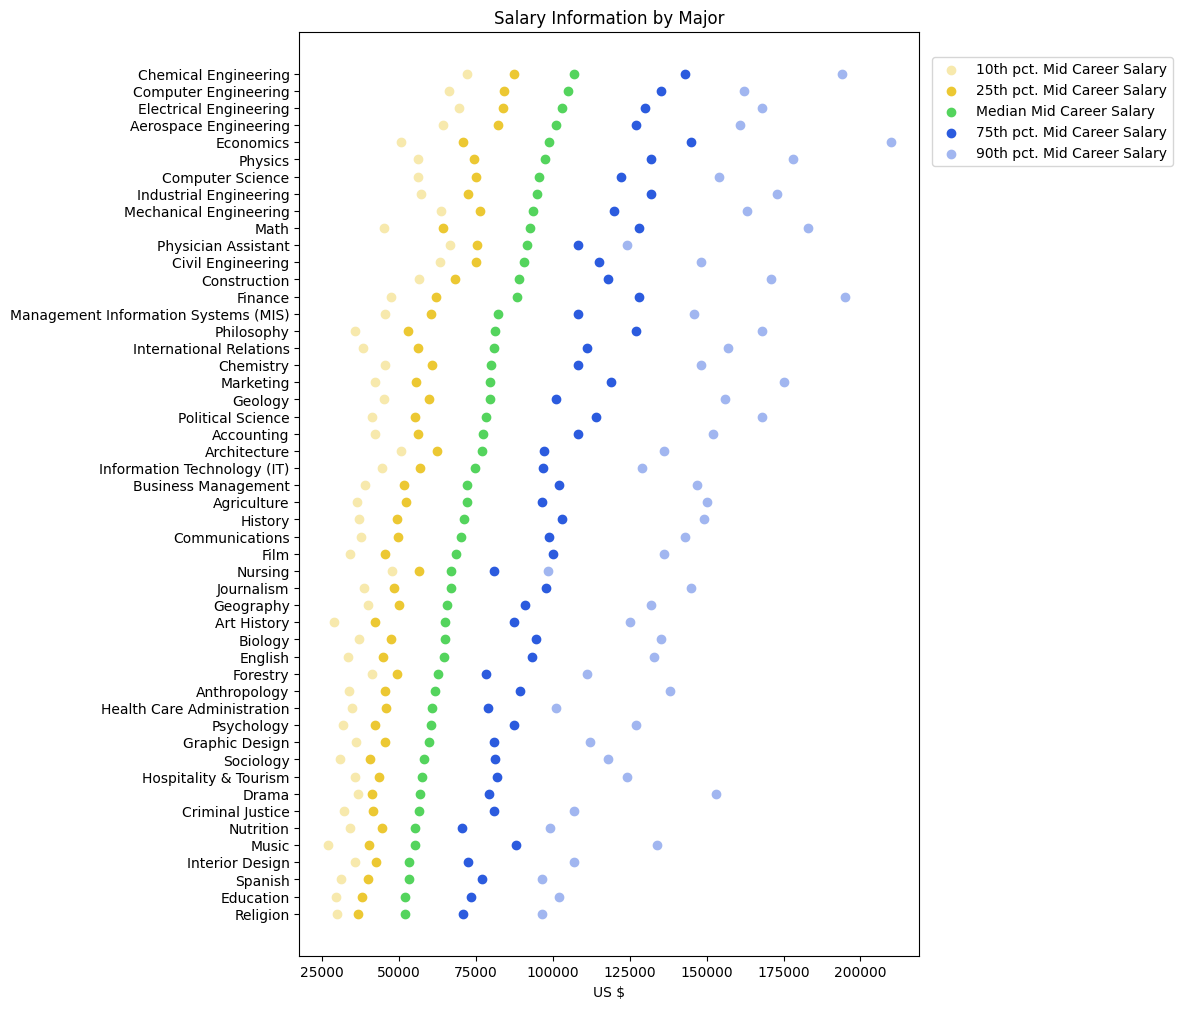

In [20]:
df2 = df1.sort_values(by = 'mid_p50', ascending = False)
df2 = df2.reset_index()

fig = plt.figure(figsize=(8,12))

x = df2['bgn_p50']
y = len(df2.index) - df2.index + 1
labels = df2['major']

#plt.scatter(x, y, color='b', label = 'Median Starting Salary')
plt.yticks(y, labels)

x1 = df2['mid_p10']
plt.scatter(x1, y, color='#f7e9ad', label = '10th pct. Mid Career Salary')

x2 = df2['mid_p25']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')

x3 = df2['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

x4 = df2['mid_p75']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')

x5 = df2['mid_p90']
plt.scatter(x5, y, color='#a1b6f0', label = '90th pct. Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.42,.98)) #move the legend

plt.show()

## Graph 3: Mid-Career Salary Percentiles by Major (w/ Grid)
### We should add some gridlines. Our previous graph was pretty, but not super useful to someone who is really analyzing the chart. Now we have a graph that is both pretty and useful -- Nice!
##### 
Analysis: Again, we see the Engineering Majors as the top money makers. 

On a general scale, looking at the medians, it seems that most people will make between $50K and $100K annual salary mid-way through their careers. For the top performers (75th pct), that range would be between $75K and $125K. Very top performers (90th pct.) will bring home between $100K and $200K yearly.

It is interesting that some majors have pretty conservative ranges of salary -- Physician's Assistants and Nursing majors.

In some the arts majors of Music and Drama, the very top performers do very well -- the top 10% performers (musicians, actors) do very well, making even more money than the top 25% of performers in the engineering/math/science majors.

The people who make the very most money, regarding the top 10% of performers, are Economics and Finance majors. That makes sense as their job is working with and analyzing money. Another strong performer, again, is Chemical Engineering. 

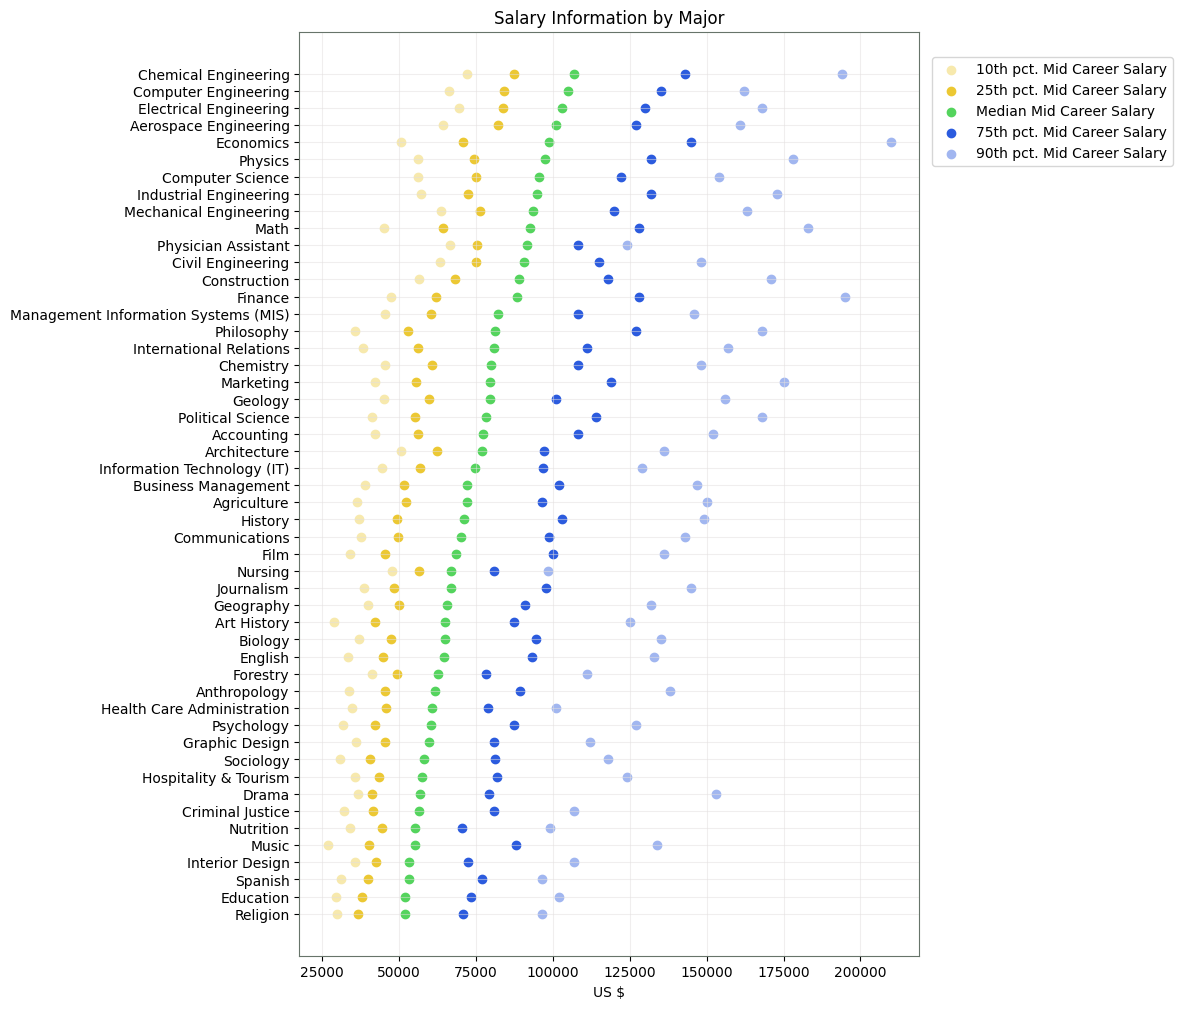

In [21]:
df2 = df1.sort_values(by = 'mid_p50', ascending = False)
df2 = df2.reset_index()

fig = plt.figure(figsize=(8,12))
matplotlib.rc('grid', alpha = .5, color = '#e3dfdf')   #color the grid lines
matplotlib.rc('axes', edgecolor = '#67746A')           #color the graph edge
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)  #this will reset default params if you need

x = df2['bgn_p50']
y = len(df2.index) - df2.index + 1
labels = df2['major']

#plt.scatter(x, y, color='b', label = 'Median Starting Salary')
plt.yticks(y, labels)

x1 = df2['mid_p10']
plt.scatter(x1, y, color='#f7e9ad', label = '10th pct. Mid Career Salary')

x2 = df2['mid_p25']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')

x3 = df2['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

x4 = df2['mid_p75']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')

x5 = df2['mid_p90']
plt.scatter(x5, y, color='#a1b6f0', label = '90th pct. Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.42,.98))

plt.grid(True) #turn grid on

plt.show()

##### 
Thanks! 
- Chris